In [88]:
import pandas as pd 
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns

file = "business-intelligence-project.xlsx"
data = pd.ExcelFile(file)
print(data.sheet_names) #this returns the all the sheets in the excel file


['Task 1', 'Task 1_cleaned', 'Task 2', 'Task 2_cleaned', 'Task 3', 'Task 3_cleaned']


# Task 1

In [89]:
df = data.parse("Task 1_cleaned")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Employee ID  60 non-null     int64  
 1   Sales        60 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [90]:
df.head(10)

,Employee ID,Sales
0,1001,482.660296
1,1002,3353.827431
2,1003,8716.268720
3,1004,5268.511955
4,1005,5272.372750
5,1006,4521.799891
6,1007,339.079381
7,1008,2498.285741
8,1009,4300.096754
9,1010,3531.549682


In [91]:
data_mean = st.mean(df.Sales)
data_median = st.median(df.Sales)
data_mode = st.mode(df.Sales)
data_max = max(df.Sales)
data_min = min(df.Sales)
data_stdev = st.stdev(df.Sales)


print ("Mean is :", data_mean)
print ("Median is :", data_median)
print ("Mode is :", data_mode)
print ("Maximum Value is :", data_max)
print ("Minimum Value is :", data_min)
print ("Standard Deviation is :", data_stdev)

Mean is : 4444.581353167947
Median is : 4290.390277792758
Mode is : 482.6602960145865
Maximum Value is : 9676.027108133301
Minimum Value is : 338.6298319322356
Standard Deviation is : 2689.999286261166


## Virtrualizaiton the distribution of the sales data

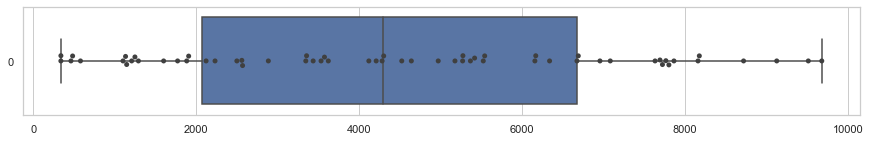

In [92]:


sns.set_theme(style="whitegrid")
plt.figure (figsize=(15,2))

ax = sns.boxplot(orient = "h", data=df.Sales)
ax = sns.swarmplot(orient = "h",data=df.Sales, color=".25")


<AxesSubplot:xlabel='Sales', ylabel='Density'>

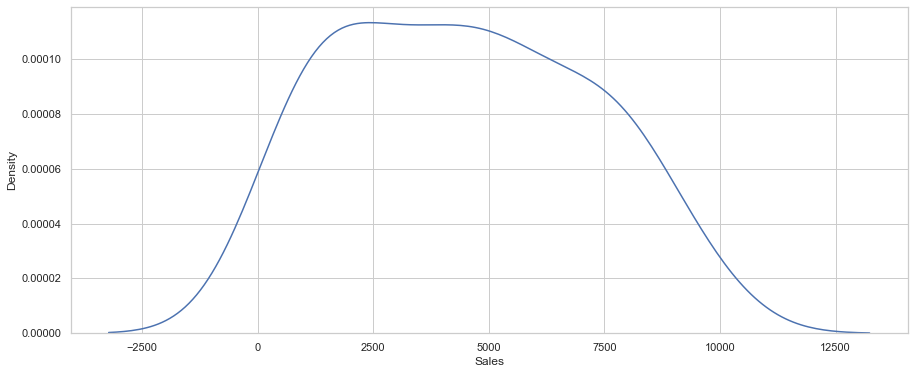

In [93]:
plt.figure (figsize=(15,6))
sns.kdeplot(data=df.Sales)

# Task 2

In [94]:
df = data.parse("Task 2_cleaned")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Store Name                           30 non-null     object 
 1   Number of Customer Made a Purchased  30 non-null     float64
 2   Total Number of Customer Visited     30 non-null     float64
dtypes: float64(2), object(1)
memory usage: 848.0+ bytes


In [95]:
df.head()

,Store Name,Number of Customer Made a Purchased,Total Number of Customer Visited
0,Store 1,800.000000,7460.773582
1,Store 2,650.000000,1951.818302
2,Store 3,544.000000,4377.379323
3,Store 4,825.194161,5501.294408
4,Store 5,157.186864,1209.129724


In [97]:
df["Customer Conversion Rate"] = df["Number of Customer Made a Purchased"]/df["Total Number of Customer Visited"]
df.head()

,Store Name,Number of Customer Made a Purchased,Total Number of Customer Visited,Customer Conversion Rate
0,Store 1,800.000000,7460.773582,0.107227
1,Store 2,650.000000,1951.818302,0.333023
2,Store 3,544.000000,4377.379323,0.124275
3,Store 4,825.194161,5501.294408,0.150000
4,Store 5,157.186864,1209.129724,0.130000


In [100]:
data_mean = st.mean(df["Customer Conversion Rate"])
data_median = st.median(df["Customer Conversion Rate"])
data_mode = st.mode(df["Customer Conversion Rate"])
data_range = max(df["Customer Conversion Rate"])-min(df["Customer Conversion Rate"])
data_stdev = st.stdev(df["Customer Conversion Rate"])


print ("Mean is :", data_mean)
print ("Median is :", data_median)
print ("Mode is :", data_mode)
print ("Range(max-min) is :", data_range)
print ("Standard Deviation is :", data_stdev)

Mean is : 0.16816762024029097
Median is : 0.1275
Mode is : 0.18
Range(max-min) is : 0.2867797876971312
Standard Deviation is : 0.08102405976755989
